# Credit Card Fraud

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv("/creditcardfraud/creditcard.csv", index_col=0)

In [20]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [25]:
#create a y list from the Class variable in df
y = df.Class
y.head()

Time
0.0    0
0.0    0
1.0    0
1.0    0
2.0    0
Name: Class, dtype: int64

In [24]:
#Remove the Class column from df
df_edit = df.drop('Class', 1)
df_edit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_edit, y, test_size=0.20)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,,,,,,,,,,,,,,,,,,,,,
124268.0,2.052436,0.024136,-1.596052,0.474595,0.238145,-1.379271,0.608209,-0.533278,0.216936,0.069916,...,-0.132447,-0.010899,0.194556,0.048996,0.138013,0.206514,0.552584,-0.093326,-0.071078,23.95
218.0,-0.391725,1.106355,0.787765,0.510525,0.832968,0.151659,0.588155,0.312914,-0.772829,-0.868831,...,-0.155767,0.122192,0.365018,-0.213950,-0.421854,0.045355,-0.323299,0.080659,0.037889,1.00
161117.0,-0.372026,1.202564,-0.441528,-0.876001,0.768650,-0.562121,0.863352,0.037144,0.093866,-0.131954,...,0.124842,-0.361963,-0.715755,-0.053467,-0.994686,-0.281194,0.178948,0.075298,-0.147119,6.26
6732.0,-1.259077,0.921857,2.279660,0.597592,0.514404,0.107890,1.117787,-0.324715,-0.002571,-0.072741,...,-0.211371,-0.491222,-1.022948,0.142214,-0.049260,0.024469,0.446625,-0.382243,-0.269859,73.30
76997.0,-0.475681,1.148804,0.817623,1.490275,-0.298314,-0.156263,0.310415,0.421805,-0.843660,-0.215070,...,0.013630,0.251203,0.634339,0.045592,0.079844,-0.476649,-0.157187,0.081603,0.111937,45.50


## Decision Tree

In [74]:
from sklearn import tree
from sklearn import metrics
model_clf_df = tree.DecisionTreeClassifier()

In [75]:
model_clf_df = model_clf_df.fit(X_train, y_train)
y_pred_df = model_clf_df.predict(X_test)

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_df))

Accuracy: 0.9989291106351603


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_df))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56840
           1       0.77      0.71      0.74       122

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.88      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



## Random Forests

In [82]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Gaussian classifier
rand_forest_clf = RandomForestClassifier(n_estimators=20)
# Model training
rand_forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
# Prediction
y_pred_rand = rand_forest_clf.predict(X_test)

In [84]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rand))

Accuracy: 0.9993679997191109


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56840
           1       0.91      0.78      0.84       122

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



## K Nearest Neighbours

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9992099996488887


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56840
           1       0.94      0.67      0.78       122

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.97      0.84      0.89     56962
weighted avg       1.00      1.00      1.00     56962



## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression


In [62]:
df2 = pd.get_dummies(df)
df2_edit = df2.drop('Amount', 1)
df2_edit = df2_edit.drop('Class', 1)

In [63]:
df2_edit.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

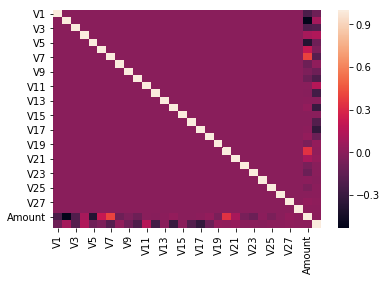

In [65]:
sns.heatmap(df2_edit.corr())
plt.show()

There appears to be no correlation between any of the values

In [68]:
log_clf = LogisticRegression(random_state=0)
log_clf.fit(X_train, y_train)

C:\Users\ZAP-DS\Anaconda3\envs\tf15\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
y_pred_log = log_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_log)
print(confusion_matrix)

[[56826    14]
 [   44    78]]


In [72]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56840
           1       0.85      0.64      0.73       122

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



What we can see is that precision, recall, and the f1 score for decision tree, logistic regression, K nearest neighbours, and randon forests are all able to identify the normal transactions (0). Now analyzing the precision, recall, and f1 scores things change. 

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log)

array([[56826,    14],
       [   44,    78]], dtype=int64)

In [93]:
df_confusion_log = pd.crosstab(y_test, y_pred_log)
df_confusion_log

col_0,0,1
Class,,
0,56826,14
1,44,78


In [104]:
df_confusion_log = pd.crosstab(y_test, y_pred_log, rownames=['Actual'], colnames=['Predicted'])#, margins=True)
df_confusion_log

Predicted,0,1
Actual,,
0,56826,14
1,44,78


In [105]:
#Lets normalize the confusion matrix
df_conf_norm_log = df_confusion_log / df_confusion_log.sum(axis=1)

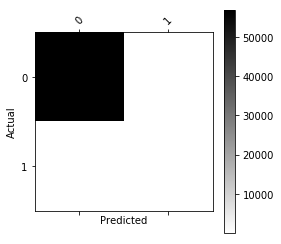

In [106]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion_log, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion_log, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion_log.columns))
    plt.xticks(tick_marks, df_confusion_log.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion_log.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion_log.index.name)
    plt.xlabel(df_confusion_log.columns.name)

plot_confusion_matrix(df_confusion_log)

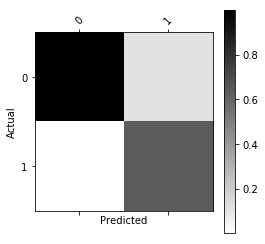

In [107]:
plot_confusion_matrix(df_conf_norm_log)